In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pathlib import Path
from tkinter import filedialog
import seaborn as sns
import itertools
from colour import Color
from datetime import date
import tifffile
import scipy  as spy
from skimage import filters
import scipy.stats as stats
import pingouin as pg

C:\ProgramData\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
today = date.today()
print("Today's date:", today)
date_today = str(today)
date_today

Today's date: 2022-06-27


'2022-06-27'

In [3]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
snsblue = '#225b91'
cyan = '#0089CF'
green = '#79BA1A'
darkgreen = '#00A01A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
yellow = '#FFCB05'
lightyellow = '#F9DC2D'
pink = '#FFA4CD'
StartHue1 = Color(purple)
DC1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
DC2color = list(StartHue2.range_to(Color(lightorange),3))
print(DC1color,DC2color)

palette = [grey,cyan] + list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green]

StartHue3 = Color(green)
greencolor = list(StartHue3.range_to(Color(darkgreen),3))
greenpalette = list(map(Color.get_hex,greencolor))

[<Color #ab4a9c>, <Color #e468b8>, <Color #ffa4cd>] [<Color #ff5b00>, <Color #ff8341>, <Color #ffac83>]


In [4]:
DCXconc = '[DCX] ' r'$(n M)$'

Type = 'DCX Type'

taxol = '[Taxol] ' r'$(\mu M)$'
taxolnM = '[Taxol] ' r'$(n M)$'

In [5]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the folder on ONE date you want to process
path = Path(askdirectory)
path

WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter')

In [6]:
folder_dates = [x for x in path.iterdir() if x.is_dir() if str(x).rfind('-analyze') != -1]
folders = []
for i in folder_dates:
    folders0 = [x for x in i.iterdir() if x.is_dir() if str(x).rfind('yes') != -1]
    
    for j in folders0:
        folders = folders + [x for x in j.iterdir() if x.is_dir() if str(x).rfind('Kymo') != -1]

folders

[WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter/2022-05-11_control_flowin_phalloidin_taxol-analyze/CH1_DCX2nM_TypeWT_tax0uM-yes/Kymographs-1-Stream_ctl_Composite-gfpcrap'),
 WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter/2022-05-11_control_flowin_phalloidin_taxol-analyze/CH1_DCX2nM_TypeWT_tax0uM-yes/Kymographs-1-Stream_ctl_Composite_GFP'),
 WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter/2022-05-11_control_flowin_phalloidin_taxol-analyze/CH1_DCX2nM_TypeWT_tax0uM-yes/Kymographs-1-Stream_ctl_Composite_RFP'),
 WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter/2022-05-18_flowin_phalloidin_newtaxol-analyze/CH2_DCX2nM_TypeWT_tax0.1uM-yes/Kymographs-1-Stream_Composite_GFP'),
 WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter/2022-05-18_flowin_phalloidin_newtaxol-analyze/CH2_DCX2nM_TypeWT_tax0.1uM-yes/Kymographs-1-Stream_Composite_gfpcrap'),
 WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter/2022-05-18_flowin_phalloidin_

In [7]:
GFP_files = []
RFP_files = []
gfpcrap_files = []
for i in folders:
    GFP_files = GFP_files + [x for x in i.iterdir() if x.is_file() if str(x).rfind('GFP') != -1]
    RFP_files = RFP_files + [x for x in i.iterdir() if x.is_file() if str(x).rfind('RFP') != -1]
    gfpcrap_files = gfpcrap_files + [x for x in i.iterdir() if x.is_file() if str(x).rfind('gfpcrap') != -1]
GFP_files[0],GFP_files[-1],RFP_files[0],RFP_files[-1],gfpcrap_files[0],gfpcrap_files[-1]

(WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter/2022-05-11_control_flowin_phalloidin_taxol-analyze/CH1_DCX2nM_TypeWT_tax0uM-yes/Kymographs-1-Stream_ctl_Composite_GFP/Kymograph_001_0500-0385-0416.tif'),
 WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter/2022-05-26_flowin_phalloidin_newtaxol-analyze/CH6_DCX2nM_TypeWT_tax10uM-yes/Kymographs-1-Stream_Composite_GFP/Kymograph_015_0345-0108-0323.tif'),
 WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter/2022-05-11_control_flowin_phalloidin_taxol-analyze/CH1_DCX2nM_TypeWT_tax0uM-yes/Kymographs-1-Stream_ctl_Composite_RFP/Kymograph_001_0124-0290-0217.tif'),
 WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter/2022-05-26_flowin_phalloidin_newtaxol-analyze/CH6_DCX2nM_TypeWT_tax10uM-yes/Kymographs-1-Stream_Composite_RFP/Kymograph_010_0001-0367-0118.tif'),
 WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter/2022-05-11_control_flowin_phalloidin_taxol-analyze/CH1_DCX2nM_TypeWT_tax0uM-yes/Kymographs

## Get Metadata ##

In [8]:
def metadata(file):

    i = file
    dateloc = str(i).rfind("2022")

    CHloc = str(i).find("CH")
    CHlocend = str(i).find('_', CHloc)

    taxloc = str(i).rfind('tax')
    taxlocend = str(i).find('uM', taxloc)

    DCXloc = str(i).rfind('DCX')
    DCXlocend = str(i).find('nM', DCXloc)

    dcxtypeloc = str(i).find("Type")
    dcxtypelocend = str(i).find('_', dcxtypeloc)

    date = [str(i)[dateloc : dateloc+10]]
    ch = [str(i)[CHloc+2:CHlocend]]
    conc_tax = [float(str(i)[taxloc+3:taxlocend])]
    conc_DCX = [float(str(i)[DCXloc+3:DCXlocend])]
    DCX_type = [str(i)[dcxtypeloc+4:dcxtypelocend]]
    
    filename = i.stem
    
    if str(i).rfind('GFP') != -1:
        Channel = 'GFP'
    if str(i).rfind('RFP') != -1:
        Channel = 'RFP'
    if str(i).rfind('gfpcrap') != -1:
        Channel = 'Non-Specific GFP'
    
    MD = pd.DataFrame({'Date': date, 'Filename': filename, 'CH': ch, taxol: conc_tax, DCXconc: conc_DCX, Type: DCX_type, 'Channel': Channel})

    return MD

In [9]:
metadata(RFP_files[0])

,Date,Filename,CH,[Taxol] $(\mu M)$,[DCX] $(n M)$,DCX Type,Channel
0,2022-05-11,Kymograph_001_0124-0290-0217,1,0.0,2.0,WT,RFP


## Open kymograph ##

In [10]:
kymoR = tifffile.imread(GFP_files[0])
kymoG = tifffile.imread(RFP_files[0])
kymoC = tifffile.imread(gfpcrap_files[0])

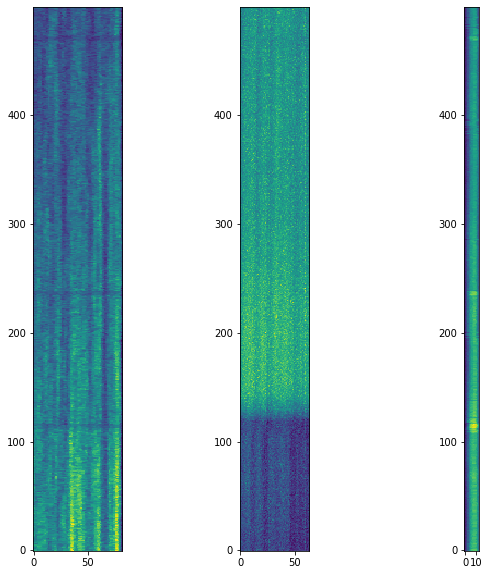

In [11]:
fig, ax = plt.subplots(1,3,figsize=(10,10))

ax[0].imshow(kymoR, interpolation='none', origin=[0, 0], cmap='viridis')
ax[1].imshow(kymoG, interpolation='none', origin=[0, 0], cmap='viridis')
ax[2].imshow(kymoC, interpolation='none', origin=[0, 0], cmap='viridis')

In [12]:
def normalize(array):
    return (array - min(array)) / (max(array) - min(array))

In [13]:
def kymo_intensity(file,roll):
    
    md = metadata(file)
    
    kymo = tifffile.imread(file)
    mean_kymo = np.mean(kymo, axis=1)
    time = np.arange(len(mean_kymo))/10
    result0 = pd.DataFrame({'Time (s)': time, 'Intensity': mean_kymo})
    
    t= len(time)
    md = md.loc[md.index.repeat(t)].reset_index(drop=True) 
    result = pd.concat([md, result0], axis=1)
    
    result['Rolling Intensity'] =  result['Intensity'].rolling(roll, min_periods=1, center=True).mean()
    result['Rolling Intensity std'] =  result['Intensity'].rolling(roll, min_periods=1, center=True).std()
    
    array = result['Intensity'].values
    result['Normal Intensity'] =  normalize(array)

    array = result['Rolling Intensity'].values
    result['Normal Rolling Intensity'] =  normalize(array)
    result['Normal Rolling Intensity std'] = result['Rolling Intensity std']/(max(array) - min(array))
        
    return result

In [14]:
def grouped_results(files,roll):

    results = pd.DataFrame(columns=[] , index=[])
    for i in files:
        result0 = kymo_intensity(i,10)
        results = pd.concat([results, result0])
    
    grouped_results = results.groupby(['Date', 'CH','Time (s)']).mean()
    grouped_results = grouped_results.reset_index()
    
    grouped_results = grouped_results.round({taxol: 1})

#     array = grouped_results['Intensity'].values
#     grouped_results['Normal Intensity'] =  (array - min(array)) / (max(array) - min(array))

#     array = grouped_results['Rolling Intensity'].values
#     grouped_results['Normal Rolling Intensity'] =  (array - min(array)) / (max(array) - min(array))
#     grouped_results['Normal Rolling Intensity std'] = grouped_results['Rolling Intensity std']/(max(array) - min(array)) 

    return grouped_results

In [15]:
roll = 10

In [16]:
results_GFP = pd.DataFrame(columns=[] , index=[])
for i in GFP_files:
    result0 = kymo_intensity(i,roll)
    results_GFP = pd.concat([results_GFP, result0])

# array = results_GFP['Intensity'].values
# results_GFP['Normal Intensity'] =  (array - min(array)) / (max(array) - min(array))

# array = results_GFP['Rolling Intensity'].values
# results_GFP['Normal Rolling Intensity'] =  (array - min(array)) / (max(array) - min(array))
# results_GFP['Normal Rolling Intensity std'] = results_GFP['Rolling Intensity std']/(max(array) - min(array)) 
    
results_GFP

,Date,Filename,CH,[Taxol] $(\mu M)$,[DCX] $(n M)$,DCX Type,Channel,Time (s),Intensity,Rolling Intensity,Rolling Intensity std,Normal Intensity,Normal Rolling Intensity,Normal Rolling Intensity std
0,2022-05-11,Kymograph_001_0500-0385-0416,1,0.0,2.0,WT,GFP,0.0,98.353659,95.909756,1.695705,1.000000,0.999128,0.033977
1,2022-05-11,Kymograph_001_0500-0385-0416,1,0.0,2.0,WT,GFP,0.1,94.231707,95.953252,1.520422,0.929081,1.000000,0.030464
2,2022-05-11,Kymograph_001_0500-0385-0416,1,0.0,2.0,WT,GFP,0.2,95.646341,95.472125,1.883291,0.953420,0.990360,0.037735
3,2022-05-11,Kymograph_001_0500-0385-0416,1,0.0,2.0,WT,GFP,0.3,94.536585,95.533537,1.752219,0.934326,0.991590,0.035109
4,2022-05-11,Kymograph_001_0500-0385-0416,1,0.0,2.0,WT,GFP,0.4,96.780488,95.422764,1.672400,0.972933,0.989371,0.033510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2022-05-26,Kymograph_015_0345-0108-0323,6,10.0,2.0,WT,GFP,49.5,27.437500,28.303125,1.248788,0.278912,0.217043,0.062714
496,2022-05-26,Kymograph_015_0345-0108-0323,6,10.0,2.0,WT,GFP,49.6,27.812500,28.232639,1.303270,0.292517,0.213504,0.065450
497,2022-05-26,Kymograph_015_0345-0108-0323,6,10.0,2.0,WT,GFP,49.7,27.906250,28.160156,1.373725,0.295918,0.209863,0.068988
498,2022-05-26,Kymograph_015_0345-0108-0323,6,10.0,2.0,WT,GFP,49.8,31.062500,28.370536,1.337367,0.410431,0.220429,0.067162


In [17]:
grouped_results_GFP = grouped_results(GFP_files,roll)
grouped_results_gfpcrap = grouped_results(gfpcrap_files,roll)
grouped_results_RFP = grouped_results(RFP_files,roll)

In [18]:
grouped_results_GFP

,Date,CH,Time (s),[Taxol] $(\mu M)$,[DCX] $(n M)$,Intensity,Rolling Intensity,Rolling Intensity std,Normal Intensity,Normal Rolling Intensity,Normal Rolling Intensity std
0,2022-05-11,1,0.0,0.0,2.0,78.128984,75.257295,2.501501,0.950519,0.989282,0.079901
1,2022-05-11,1,0.1,0.0,2.0,75.482945,74.855689,2.890834,0.895220,0.978562,0.090106
2,2022-05-11,1,0.2,0.0,2.0,74.532646,74.177119,3.396216,0.873352,0.959660,0.102242
3,2022-05-11,1,0.3,0.0,2.0,74.051668,73.912304,3.338382,0.851508,0.952166,0.099929
4,2022-05-11,1,0.4,0.0,2.0,74.090233,73.581913,3.312818,0.852219,0.942145,0.099153
...,...,...,...,...,...,...,...,...,...,...,...
7495,2022-05-26,6,49.5,10.0,2.0,25.865107,26.485453,1.616193,0.140445,0.097131,0.054454
7496,2022-05-26,6,49.6,10.0,2.0,27.011338,26.489456,1.588223,0.167432,0.097876,0.054331
7497,2022-05-26,6,49.7,10.0,2.0,26.238054,26.479171,1.649993,0.147647,0.098123,0.056523
7498,2022-05-26,6,49.8,10.0,2.0,26.937320,26.437463,1.628578,0.167507,0.096591,0.054104


## Save Data ##

In [22]:
newdirectory = str(path)+'//Photobleaching_Data_Sheets//'+ date_today
newmydir = Path(newdirectory)
newmydir.mkdir(exist_ok=True)
newmydir

WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter/Photobleaching_Data_Sheets/2022-06-27')

In [23]:
results_GFP.to_csv(newmydir/('results_GFP_analysed-on_'+date_today+'.csv'), encoding='utf-8', index=False)
grouped_results_GFP.to_csv(newmydir/('grouped_results_GFP_analysed-on_'+date_today+'.csv'), encoding='utf-8', index=False)
grouped_results_gfpcrap.to_csv(newmydir/('grouped_results_gfpcrap_analysed-on_'+date_today+'.csv'), encoding='utf-8', index=False)
grouped_results_RFP.to_csv(newmydir/('grouped_results_RFP_analysed-on_'+date_today+'.csv'), encoding='utf-8', index=False)

## Open saved data##

In [5]:
askfileGFP = filedialog.askopenfilename()
results_GFP = pd.read_csv(askfileGFP, encoding='utf-8')

In [6]:
askfile_GFP = filedialog.askopenfilename()
grouped_results_GFP = pd.read_csv(askfile_GFP, encoding='utf-8')

In [7]:
askfile_gfpcrap = filedialog.askopenfilename()
grouped_results_gfpcrap = pd.read_csv(askfile_gfpcrap, encoding='utf-8')

In [8]:
askfileRFP = filedialog.askopenfilename()
grouped_results_RFP = pd.read_csv(askfileRFP, encoding='utf-8')

In [9]:
newmydir = Path(askfileRFP).parents[0]
newmydir

WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter/Photobleaching_Data_Sheets/2022-06-27')

## Plot ##

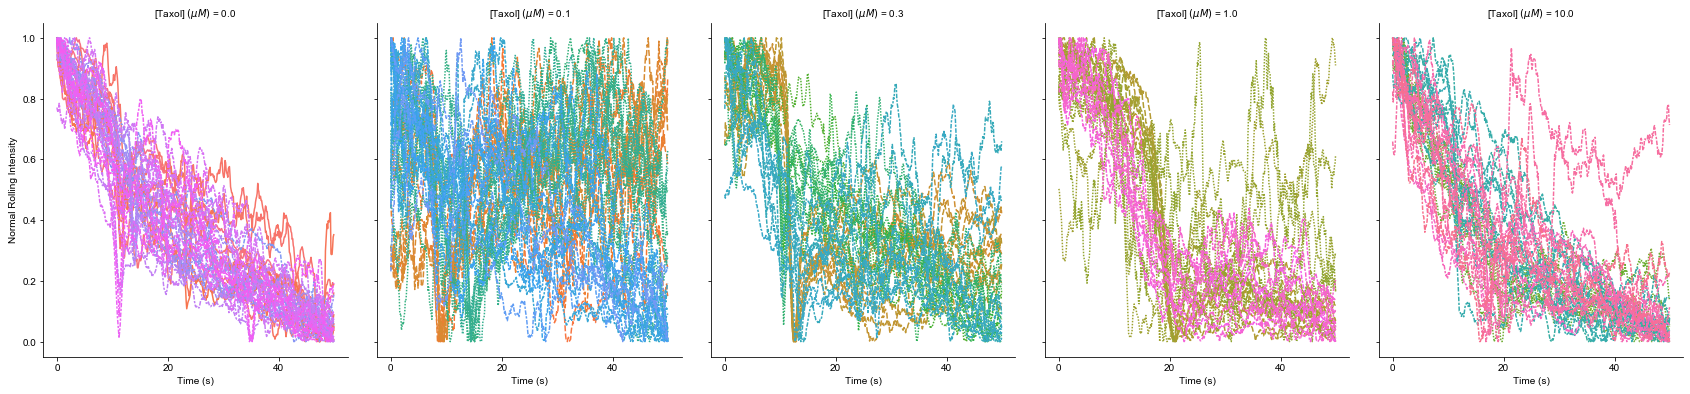

In [24]:

sns.relplot(
    data=results_GFP, x="Time (s)", y="Normal Rolling Intensity", col=taxol,
    hue="Filename", style="Date", kind="line",legend=False,
    height=6, aspect=0.8
)

sns.set_style("ticks")
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

plt.tight_layout()

# plt.savefig(newmydir/('GFP'+date_today+'.pdf'))
# plt.savefig(newmydir/('GFP'+date_today+'.png'))

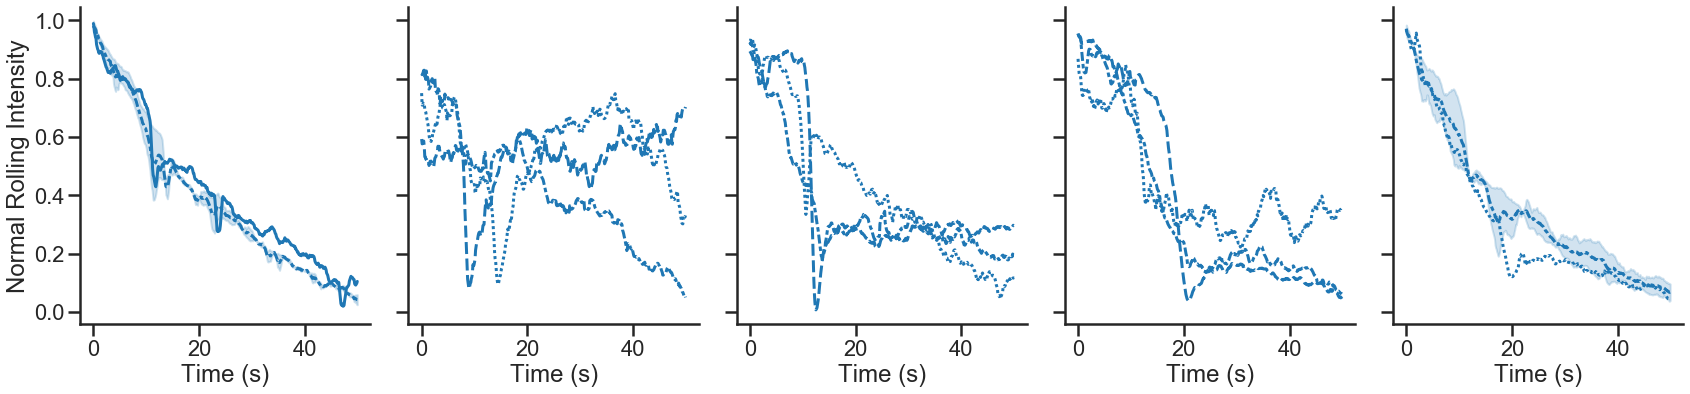

In [49]:
ax = sns.relplot(
    data=grouped_results_GFP, x="Time (s)", y="Normal Rolling Intensity", col=taxol,
    style="Date", kind="line",legend=False,
    height=6, aspect=0.8
)

ax.set_titles("")

sns.set_style("ticks")
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

plt.tight_layout()

# plt.savefig(newmydir/('RFP'+date_today+'.pdf'))
# plt.savefig(newmydir/('RFP'+date_today+'.png'))

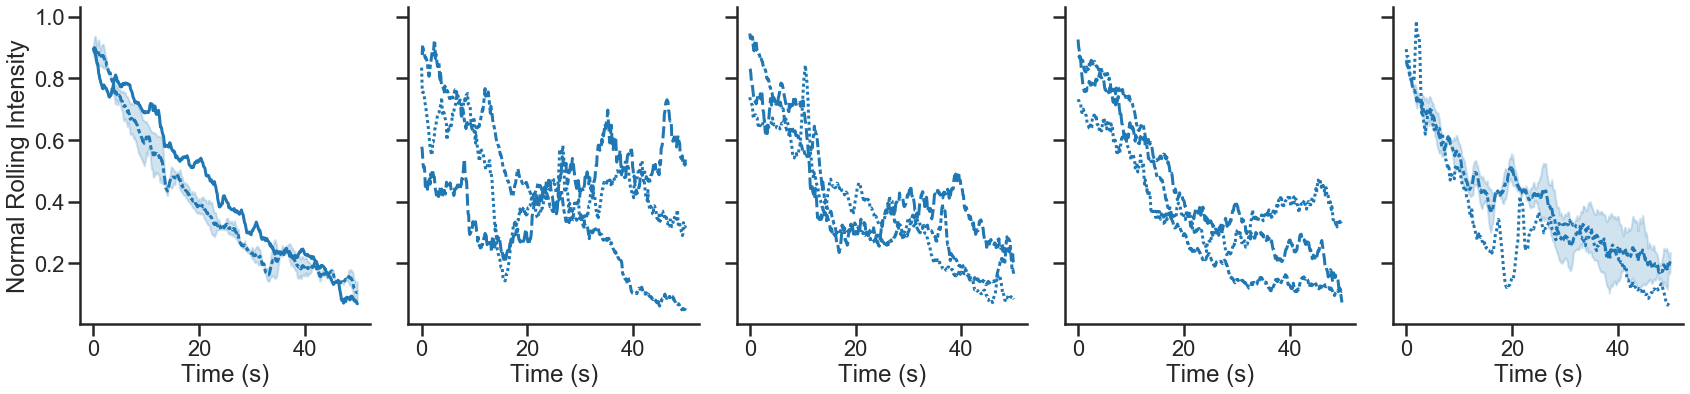

In [50]:
ax = sns.relplot(
    data=grouped_results_gfpcrap, x="Time (s)", y="Normal Rolling Intensity", col=taxol,
    style="Date", kind="line",legend=False,
    height=6, aspect=0.8
)

ax.set_titles("")

sns.set_style("ticks")
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

plt.tight_layout()

# plt.savefig(newmydir/('RFP'+date_today+'.pdf'))
# plt.savefig(newmydir/('RFP'+date_today+'.png'))

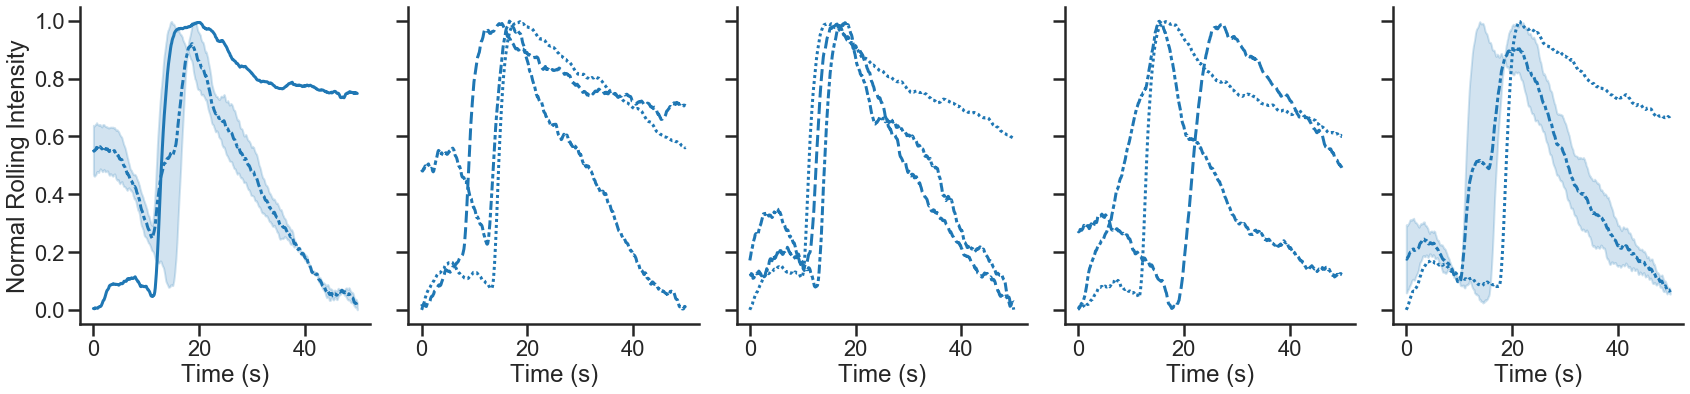

In [51]:
ax = sns.relplot(
    data=grouped_results_RFP, x="Time (s)", y="Normal Rolling Intensity", col=taxol, style = 'Date', kind="line",legend=False,
    height=6, aspect=0.8
)

ax.set_titles("")

sns.set_style("ticks")
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

plt.tight_layout()

# plt.savefig(newmydir/('RFP'+date_today+'.pdf'))
# plt.savefig(newmydir/('RFP'+date_today+'.png'))

## Substract Photobleaching & Equalizing Time ##

In [10]:
grouped_results_GFP['Substracted Normal Rolling Intensity'] = grouped_results_GFP['Normal Rolling Intensity'] - grouped_results_gfpcrap['Normal Rolling Intensity']

In [11]:
df = grouped_results_RFP
max_RFP = df.loc[df.groupby(['Date', 'CH'])["Intensity"].idxmax()] 

In [12]:
def equal_time(df,max_RFP):
    
    equal_time = pd.DataFrame(columns=[] , index=[])

    uniquedates = df['Date'].unique()
    for i in uniquedates:
        uniqueCH =  df[df['Date'] == i]['CH'].unique()

        for j in uniqueCH:
            groupdf = df[(df['Date'] == i) & (df['CH'] == j)]

            group_max_RFP = max_RFP[(max_RFP['Date'] == i) & (max_RFP['CH'] == j)]
            max_RFP_value = group_max_RFP['Time (s)'].values[0]

            groupdf['Equalized Time (s)'] = df['Time (s)'] - max_RFP_value
            
            equal_time = pd.concat([equal_time, groupdf])
    return equal_time

In [13]:
equal_time_GFP = equal_time(grouped_results_GFP,max_RFP)
equal_time_gfpcrap = equal_time(grouped_results_gfpcrap,max_RFP)
equal_time_RFP = equal_time(grouped_results_RFP,max_RFP)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [14]:
equal_time_GFP

,Date,CH,Time (s),[Taxol] $(\mu M)$,[DCX] $(n M)$,Intensity,Rolling Intensity,Rolling Intensity std,Normal Intensity,Normal Rolling Intensity,Normal Rolling Intensity std,Substracted Normal Rolling Intensity,Equalized Time (s)
0,2022-05-11,1.0,0.0,0.0,2.0,78.128984,75.257295,2.501501,0.950519,0.989282,0.079901,0.093493,-19.7
1,2022-05-11,1.0,0.1,0.0,2.0,75.482945,74.855689,2.890834,0.895220,0.978562,0.090106,0.090567,-19.6
2,2022-05-11,1.0,0.2,0.0,2.0,74.532646,74.177119,3.396216,0.873352,0.959660,0.102242,0.071641,-19.5
3,2022-05-11,1.0,0.3,0.0,2.0,74.051668,73.912304,3.338382,0.851508,0.952166,0.099929,0.070856,-19.4
4,2022-05-11,1.0,0.4,0.0,2.0,74.090233,73.581913,3.312818,0.852219,0.942145,0.099153,0.065250,-19.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,2022-05-26,6.0,49.5,10.0,2.0,25.865107,26.485453,1.616193,0.140445,0.097131,0.054454,-0.138776,27.2
7496,2022-05-26,6.0,49.6,10.0,2.0,27.011338,26.489456,1.588223,0.167432,0.097876,0.054331,-0.126074,27.3
7497,2022-05-26,6.0,49.7,10.0,2.0,26.238054,26.479171,1.649993,0.147647,0.098123,0.056523,-0.123072,27.4
7498,2022-05-26,6.0,49.8,10.0,2.0,26.937320,26.437463,1.628578,0.167507,0.096591,0.054104,-0.135053,27.5


In [15]:
equal_time_GFP.to_csv(newmydir/('equal_time_GFP_analysed-on_'+date_today+'.csv'), encoding='utf-8', index=False)
equal_time_gfpcrap.to_csv(newmydir/('equal_time_gfpcrap_analysed-on_'+date_today+'.csv'), encoding='utf-8', index=False)
equal_time_RFP.to_csv(newmydir/('equal_time_RFP_analysed-on_'+date_today+'.csv'), encoding='utf-8', index=False)

In [16]:
# ax = sns.relplot(
#     data=equal_time_GFP, x='Equalized Time (s)', y="Substracted Normal Rolling Intensity", col=taxol, kind="line",legend=False,
#     height=6, aspect=0.8
# )

# sns.set_style("ticks")
# sns.despine()
# sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

# plt.tight_layout()

# # plt.savefig(newmydir/('RFP'+date_today+'.pdf'))
# # plt.savefig(newmydir/('RFP'+date_today+'.png'))

In [17]:
df = equal_time_gfpcrap
df = df[(df[taxol] == 1)]
df['CH'].unique()

array([4., 1., 5.])

In [20]:
df = equal_time_GFP
i = 10
df = df[(df[taxol] == i)&(df['CH'] == 2)]
df

,Date,CH,Time (s),[Taxol] $(\mu M)$,[DCX] $(n M)$,Intensity,Rolling Intensity,Rolling Intensity std,Normal Intensity,Normal Rolling Intensity,Normal Rolling Intensity std,Substracted Normal Rolling Intensity,Equalized Time (s)
2500,2022-05-19,2.0,0.0,10.0,2.0,60.959463,58.474658,2.554906,0.939660,0.971437,0.066765,0.076956,-21.4
2501,2022-05-19,2.0,0.1,10.0,2.0,58.075381,58.107482,2.772771,0.883146,0.962588,0.072069,0.088457,-21.3
2502,2022-05-19,2.0,0.2,10.0,2.0,58.172821,57.910202,2.722757,0.887469,0.958191,0.070845,0.087821,-21.2
2503,2022-05-19,2.0,0.3,10.0,2.0,57.847482,57.757278,2.648974,0.873721,0.954740,0.068551,0.083846,-21.1
2504,2022-05-19,2.0,0.4,10.0,2.0,57.318140,57.566752,2.624501,0.864158,0.949516,0.068278,0.080068,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2022-05-19,2.0,49.5,10.0,2.0,21.449445,21.259514,1.712241,0.089309,0.045131,0.045859,-0.020151,28.1
2996,2022-05-19,2.0,49.6,10.0,2.0,21.442430,21.240481,1.683318,0.088351,0.044878,0.045089,-0.021793,28.2
2997,2022-05-19,2.0,49.7,10.0,2.0,21.847859,21.191720,1.547137,0.099366,0.043079,0.041704,-0.020960,28.3
2998,2022-05-19,2.0,49.8,10.0,2.0,20.649547,21.120972,1.483671,0.069208,0.041002,0.040146,-0.024298,28.4


In [129]:
i=1
j='5'

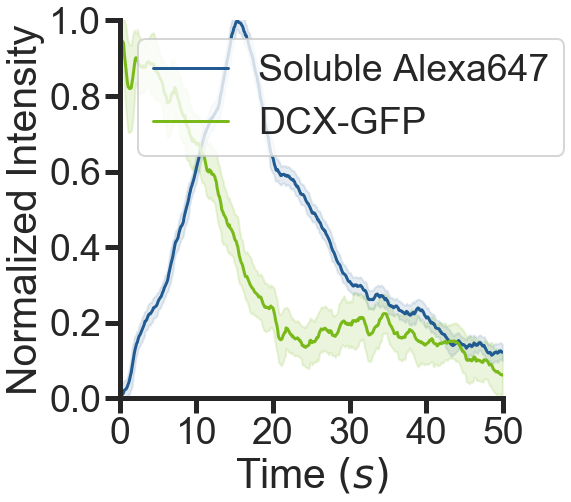

In [130]:
fig, ax = plt.subplots(1,1,figsize=(8.4,8))

df = equal_time_RFP

df = df[(df[taxol] == i)&(df['CH'] == j)]

x = df["Time (s)"].values
mean = df['Normal Rolling Intensity'].values
std = df['Normal Rolling Intensity std'].values

color = snsblue
plt.plot(x, mean, color=color, label='Soluble Alexa647')
plt.fill_between(x, mean - std, mean + std, color=color, alpha=0.12)

df = equal_time_GFP

df = df[(df[taxol] == i)&(df['CH'] == j)]

x = df["Time (s)"].values
mean = df['Normal Rolling Intensity'].values
std = df['Normal Rolling Intensity std'].values

color = green
plt.plot(x, mean, color=color, label='DCX-GFP')
plt.fill_between(x, mean - std, mean + std, color=color, alpha=0.15)

ax.legend( loc = 'upper left')

ax.set_xlabel('Time ' r'$ (s) $')
ax.set_ylabel('Normalized Intensity')

ax.set_ylim(0,1)
ax.set_xlim(0,50)
ax.set_xticks(np.arange(0, 51, 10))

sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)
ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()

#plt.savefig(newmydir/('1-raw_'+date_today+'.svg'))

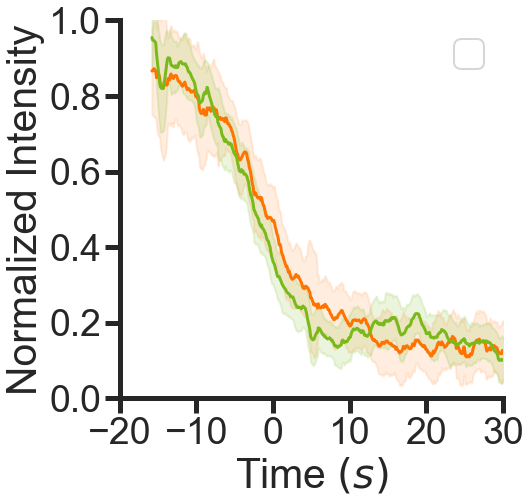

In [131]:

fig, ax = plt.subplots(1,1,figsize=(8.4,8))

df = equal_time_gfpcrap
df = df[(df[taxol] == i)&(df['CH'] ==j)]

x = df["Equalized Time (s)"].values
mean = df['Normal Rolling Intensity'].values
std = df['Normal Rolling Intensity std'].values

color = orange
plt.plot(x, mean, color=color, label='Non-Specific GFP')
plt.fill_between(x, mean - std, mean + std, color=color, alpha=0.12)

df = equal_time_GFP
df = df[(df[taxol] == i)&(df['CH'] == j)]

x = df["Equalized Time (s)"].values
mean = df['Normal Rolling Intensity'].values
std = df['Normal Rolling Intensity std'].values

color = green
plt.plot(x, mean, color=color, label='DCX-GFP')
plt.fill_between(x, mean - std, mean + std, color=color, alpha=0.15)

#ax.legend( loc = 'upper left')
ax.legend( '')

ax.set_xlabel('Time ' r'$ (s) $')
ax.set_ylabel('Normalized Intensity')

ax.set_ylim(0,1)
ax.set_xlim(None,30)
ax.set_xticks(np.arange(-20, 31, 10))

sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)
ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()

#plt.savefig(newmydir/('2-equaltime_'+date_today+'.svg'))

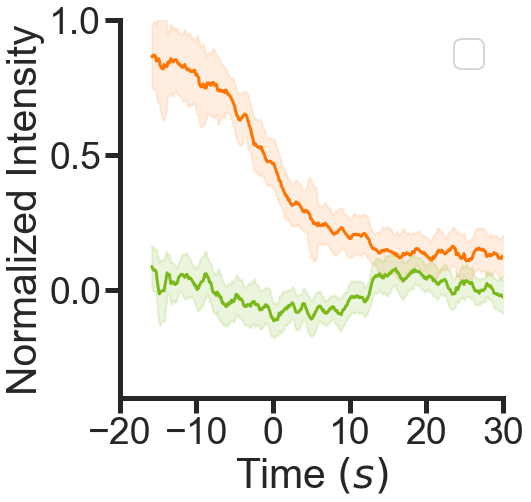

In [132]:

fig, ax = plt.subplots(1,1,figsize=(8.4,8))

df = equal_time_gfpcrap
df = df[(df[taxol] == i)&(df['CH'] ==j)]

x = df["Equalized Time (s)"].values
mean = df['Normal Rolling Intensity'].values
std = df['Normal Rolling Intensity std'].values

color = orange
plt.plot(x, mean, color=color, label='Non-Specific GFP')
plt.fill_between(x, mean - std, mean + std, color=color, alpha=0.12)

df = equal_time_GFP
df = df[(df[taxol] == i)&(df['CH'] == j)]

x = df["Equalized Time (s)"].values
mean = df['Substracted Normal Rolling Intensity'].values
std = df['Normal Rolling Intensity std'].values

color = green
plt.plot(x, mean, color=color, label='DCX-GFP')
plt.fill_between(x, mean - std, mean + std, color=color, alpha=0.15)

#ax.legend( loc = 'upper left')
ax.legend( '')

ax.set_xlabel('Time ' r'$ (s) $')
ax.set_ylabel('Normalized Intensity')

ax.set_ylim(-0.4,1)
ax.set_xlim(None,30)
ax.set_xticks(np.arange(-20, 31, 10))

sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)
ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()

#plt.savefig(newmydir/('2-equaltime_'+date_today+'.svg'))

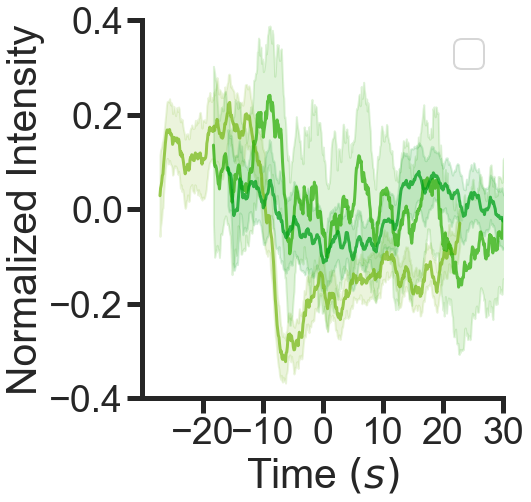

In [133]:
df = equal_time_GFP
df = df[(df[taxol] == i)]


fig, ax = plt.subplots(1,1,figsize=(8.4,8))

count = 0
for j in df['CH'].unique(): 
    

    data = df[(df[taxol] == i)&(df['CH'] == j)]

    x = data["Equalized Time (s)"].values
    mean = data['Substracted Normal Rolling Intensity'].values
    std = data['Normal Rolling Intensity std'].values

    
    plt.plot(x, mean, color=greenpalette[count], label='DCX-GFP', alpha=0.75)
    plt.fill_between(x, mean - std, mean + std, color=greenpalette[count], alpha=0.15)
    
    count += 1
    

ax.set_xlabel('Time ' r'$ (s) $')
ax.set_ylabel('Normalized Intensity')

ax.set_ylim(-0.4,0.4)
ax.set_xlim(None,30)
ax.set_xticks(np.arange(-20, 31, 10))

#ax.legend( loc = 'upper left')
ax.legend('')

sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)
ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()

#plt.savefig(newmydir/('3-substracted_'+date_today+'.svg'))

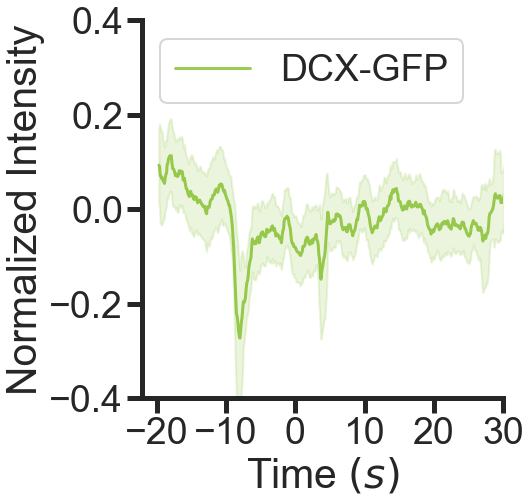

In [60]:
df = equal_time_GFP
df = df[(df[taxol] == i)&(df['CH'] =='1')]


fig, ax = plt.subplots(1,1,figsize=(8.4,8))

count = 0
 

data = df
x = data["Equalized Time (s)"].values
mean = data['Substracted Normal Rolling Intensity'].values
std = data['Normal Rolling Intensity std'].values


plt.plot(x, mean, color=greenpalette[count], label='DCX-GFP', alpha=0.75)
plt.fill_between(x, mean - std, mean + std, color=greenpalette[count], alpha=0.15)

count += 1
    

ax.set_xlabel('Time ' r'$ (s) $')
ax.set_ylabel('Normalized Intensity')

ax.set_ylim(-0.4,0.4)
ax.set_xlim(None,30)
ax.set_xticks(np.arange(-20, 31, 10))

ax.legend( loc = 'upper left')

sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)
ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()

#plt.savefig(newmydir/('3-substracted_'+date_today+'.svg'))

In [21]:
df = equal_time_GFP
uniquetaxol = df[taxol].unique()

BvsA = pd.DataFrame(columns=[] , index=[])
BvsAstats = pd.DataFrame(columns=[] , index=[])
for i in uniquetaxol:
    before = df[(df[taxol] == i) & (df['Equalized Time (s)'] < -10)]
    after = df[(df[taxol] == i) & (df['Equalized Time (s)'] > 5)]
    before['Flow'] = 'Before'
    after['Flow'] = 'After'
    BvsA0 = pd.concat([before, after])
    
    #statistics
    B = before['Substracted Normal Rolling Intensity'].values
    A = after['Substracted Normal Rolling Intensity'].values
    statistic, pvalue = stats.kruskal(A, B)
    
    BvsAstats0 = pd.DataFrame({taxol: [i],'Before Mean': [B.mean()]
                             ,'Before std': [B.std()],'After Mean': [A.mean()] ,'After std': [A.std()]})
    BvsAstats = pd.concat([BvsAstats, BvsAstats0])
    
    #equal_mean    
    BvsA0['Equalized Mean'] = BvsA0['Substracted Normal Rolling Intensity'] - B.mean()
    
    BvsA = pd.concat([BvsA, BvsA0])
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [22]:
BvsA.to_csv(newmydir/('beforeVSafter_GFP_analysed-on_'+date_today+'.csv'), encoding='utf-8', index=False)

In [23]:
BvsAstats['Mean Difference'] = BvsAstats['Before Mean'] - BvsAstats['After Mean']
BvsAstats['Mean std'] = BvsAstats['Before std']**2 + BvsAstats['After std']**2
BvsAstats['Mean std'] = BvsAstats['Mean std']**(1/2)
BvsAstats

,[Taxol] $(\mu M)$,Before Mean,Before std,After Mean,After std,Mean Difference,Mean std
0,0.0,0.052821,0.034552,-0.023803,0.042647,0.076624,0.054887
0,0.1,-0.031031,0.061888,0.098745,0.103402,-0.129775,0.120508
0,0.3,0.076880,0.105657,-0.019744,0.068375,0.096624,0.125852
0,1.0,0.109061,0.056525,-0.041696,0.072220,0.150757,0.091710
0,10.0,0.072750,0.046970,-0.098937,0.049984,0.171686,0.068590


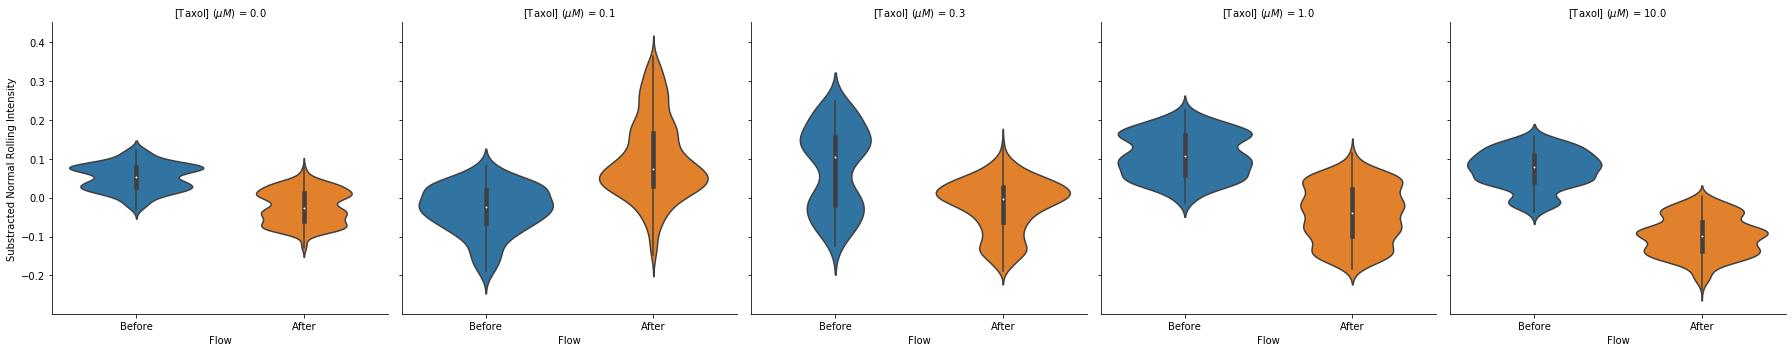

In [24]:
g = sns.catplot(x="Flow", y="Substracted Normal Rolling Intensity",
                col=taxol, data=BvsA, kind="violin" )


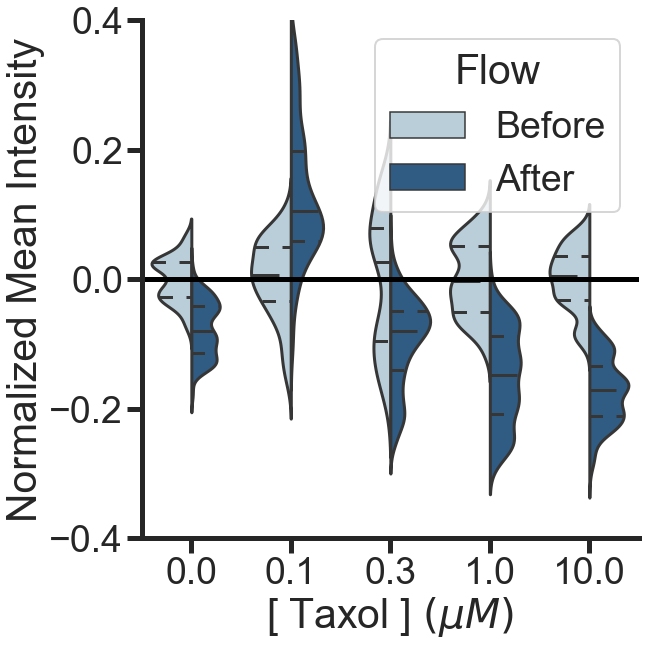

In [119]:
snsblue = '#225b91'
snslightblue = '#b5cfde'

fig, ax = plt.subplots(1,1,figsize=(10,10))



ax = sns.violinplot(x=taxol, y="Equalized Mean", hue='Flow', data=BvsA,
               split=True, inner="quart", linewidth=3,
               palette={"Before": snslightblue, "After": snsblue})
ax.axhline(y = 0, color = "0" ,linestyle="-", linewidth=5)

ax.set_xlabel('[ Taxol ] ' r'$ ( \mu M ) $')
ax.set_ylabel('Normalized Mean Intensity')
ax.legend( loc = 'upper right', title = 'Flow')
ax.set_ylim(-0.4,0.4)

sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)
ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()

#plt.savefig(newmydir/('photobleaching_'+date_today+'.svg'))

In [25]:
df = BvsA
meanBefore = df.groupby([taxol, 'Flow'])["Substracted Normal Rolling Intensity"].mean()
meanBefore

[Taxol] $(\mu M)$  Flow  
0.0                After    -0.023803
                   Before    0.052821
0.1                After     0.098745
                   Before   -0.031031
0.3                After    -0.019744
                   Before    0.076880
1.0                After    -0.041696
                   Before    0.109061
10.0               After    -0.098937
                   Before    0.072750
Name: Substracted Normal Rolling Intensity, dtype: float64

In [26]:
BvsA

,Date,CH,Time (s),[Taxol] $(\mu M)$,[DCX] $(n M)$,Intensity,Rolling Intensity,Rolling Intensity std,Normal Intensity,Normal Rolling Intensity,Normal Rolling Intensity std,Substracted Normal Rolling Intensity,Equalized Time (s),Flow,Equalized Mean
0,2022-05-11,1.0,0.0,0.0,2.0,78.128984,75.257295,2.501501,0.950519,0.989282,0.079901,0.093493,-19.7,Before,0.040672
1,2022-05-11,1.0,0.1,0.0,2.0,75.482945,74.855689,2.890834,0.895220,0.978562,0.090106,0.090567,-19.6,Before,0.037746
2,2022-05-11,1.0,0.2,0.0,2.0,74.532646,74.177119,3.396216,0.873352,0.959660,0.102242,0.071641,-19.5,Before,0.018820
3,2022-05-11,1.0,0.3,0.0,2.0,74.051668,73.912304,3.338382,0.851508,0.952166,0.099929,0.070856,-19.4,Before,0.018035
4,2022-05-11,1.0,0.4,0.0,2.0,74.090233,73.581913,3.312818,0.852219,0.942145,0.099153,0.065250,-19.3,Before,0.012429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,2022-05-26,6.0,49.5,10.0,2.0,25.865107,26.485453,1.616193,0.140445,0.097131,0.054454,-0.138776,27.2,After,-0.211526
7496,2022-05-26,6.0,49.6,10.0,2.0,27.011338,26.489456,1.588223,0.167432,0.097876,0.054331,-0.126074,27.3,After,-0.198824
7497,2022-05-26,6.0,49.7,10.0,2.0,26.238054,26.479171,1.649993,0.147647,0.098123,0.056523,-0.123072,27.4,After,-0.195822
7498,2022-05-26,6.0,49.8,10.0,2.0,26.937320,26.437463,1.628578,0.167507,0.096591,0.054104,-0.135053,27.5,After,-0.207803


In [27]:
curve = results_GFP.groupby([taxol])['Filename'].unique()
curve

[Taxol] $(\mu M)$
0.0     [Kymograph_001_0500-0385-0416, Kymograph_002_0...
0.1     [Kymograph_001_0118-0348-0373, Kymograph_002_0...
0.3     [Kymograph_001_0283-0198-0304, Kymograph_002_0...
1.0     [Kymograph_001_0459-0253-0241, Kymograph_002_0...
10.0    [Kymograph_001_0459-0118-0376, Kymograph_002_0...
Name: Filename, dtype: object

In [28]:
curve = results_GFP.groupby([taxol])['Filename'].unique()
curveN = 0

for i in curve:
    print(len(i))


37
41
33
28
39


In [29]:
uniquetaxol

array([ 0. ,  0.1,  0.3,  1. , 10. ])

In [30]:
df['CH'].unique()

array([1. , 4. , 4.2, 2. , 3. , 3.2, 5. , 6. ])

In [31]:
df = equal_time_GFP
uniquetaxol = df[taxol].unique()

BvsA = pd.DataFrame(columns=[] , index=[])
BvsAstats = pd.DataFrame(columns=[] , index=[])
for i in uniquetaxol:
    for j in df['CH'].unique():
        
        before = df[(df[taxol] == i)&(df['CH'] == j) & (df['Equalized Time (s)'] < -10)]
        after = df[(df[taxol] == i)&(df['CH'] == j) & (df['Equalized Time (s)'] > 5)]
        before['Flow'] = 'Before'
        after['Flow'] = 'After'
        BvsA0 = pd.concat([before, after])

#         #statistics
        B = before['Substracted Normal Rolling Intensity'].values
        A = after['Substracted Normal Rolling Intensity'].values
#         statistic, pvalue = stats.kruskal(A, B)

        BvsAstats0 = pd.DataFrame({taxol: [i],'CH': [j],'Mean': [A.mean()-B.mean()]
                                 ,'std': [B.std()+A.std()]})
        
        
        if BvsAstats0.isnull().values.any() == True:
             continue
        
        BvsAstats = pd.concat([BvsAstats, BvsAstats0])

        #equal_mean    
        BvsA0['Equalized Mean'] = BvsA0['Substracted Normal Rolling Intensity'] - B.mean()

        BvsA = pd.concat([BvsA, BvsA0])
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice.
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid val

In [32]:
BvsAstats

,[Taxol] $(\mu M)$,CH,Mean,std
0,0.0,1.0,-0.064617,0.056752
0,0.0,4.0,-0.041780,0.069552
0,0.0,4.2,-0.107828,0.071815
0,0.1,2.0,0.035122,0.137501
0,0.1,3.0,0.098533,0.067135
0,0.1,4.0,0.214313,0.152181
0,0.3,2.0,0.040935,0.093610
0,0.3,3.0,-0.207913,0.094860
0,0.3,3.2,-0.195822,0.057663
0,1.0,1.0,-0.118435,0.111473


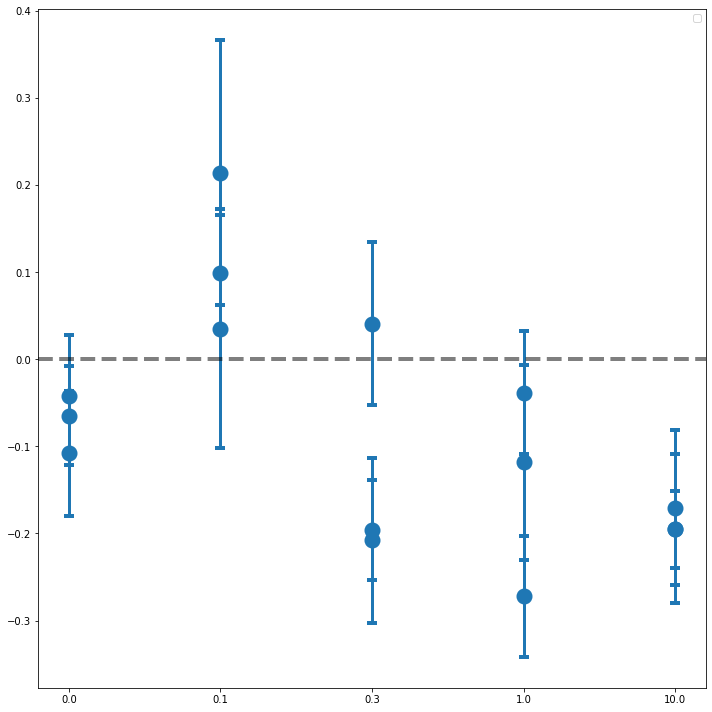

In [33]:
fig, ax = plt.subplots(1,1,figsize=(10,10))


#rect = 0,0,1,1 # create an rectangle for the new axis
#log_ax = fig.add_axes(rect) # create a new axis (or use an existing one)
#log_ax.set_xscale("log") # log first

#ax = sns.boxplot(x=taxol, y='Mean', data=BvsAstats, whis=np.inf, palette='Blues',linewidth=3)
x=BvsAstats[taxol].values
x = list(x.astype("str"))
y=BvsAstats['Mean'].values
yerr= BvsAstats['std'].values

ax.errorbar(x=x, y=y, yerr=yerr, fmt='o', markersize=12,capsize = 5,
                              markeredgewidth=4,elinewidth=3)

ax.axhline(y = 0, color = "0" ,linestyle="--", linewidth=4, alpha=0.5)

#ax.set_xscale('log')
#plt.ylim(-0.3,0.3)

# ax.set_ylim(None,4)
# ax.legend( loc = 'upper left')
ax.legend('')
# ax.set_xlabel('[ Taxol ] ' r'$ ( \mu M ) $')

# sns.set_style("ticks")
# sns.despine()
# ax.spines['left'].set_lw(5)
# ax.spines['bottom'].set_lw(5)
# ax.tick_params(axis='both', width = 5, length = 15)
# sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()


#plt.savefig(path/('expansion_'+date_today+'.svg'))

## Per Mt Substraction & eual time ##

In [34]:
df = grouped_results_RFP
max_RFP = df.loc[df.groupby(['Date', 'CH'])["Intensity"].idxmax()] 

def equal_time_photobleach_perMT(df,max_RFP, gfpcrap):
    
    equal_time = pd.DataFrame(columns=[] , index=[])
    beforeVSafter = pd.DataFrame(columns=[] , index=[])

    uniquedates = df['Date'].unique()
    for i in uniquedates:
        uniqueCH =  df[df['Date'] == i]['CH'].unique()

        for j in uniqueCH:
            uniquefile =  df[(df['Date'] == i) & (df['CH'] == j)]['Filename'].unique()
            group_gfpcrap = gfpcrap[(gfpcrap['Date'] == i) & (gfpcrap['CH'] == j)]
            
            for k in uniquefile:
                
                groupdf = df[(df['Date'] == i) & (df['CH'] == j) & (df['Filename'] == k)]

                group_max_RFP = max_RFP[(max_RFP['Date'] == i) & (max_RFP['CH'] == j)]
                max_RFP_value = group_max_RFP['Time (s)'].values[0]

                groupdf['Equalized Time (s)'] = groupdf['Time (s)'] - max_RFP_value
                groupdf['Substracted Normal Rolling Intensity'] = groupdf['Normal Rolling Intensity'].values - group_gfpcrap['Normal Rolling Intensity'].values
                
                #test = groupdf['Normal Rolling Intensity'].values

                equal_time = pd.concat([equal_time, groupdf])
    return equal_time

In [35]:
equal_time_MT = equal_time_photobleach_perMT(results_GFP,max_RFP, grouped_results_gfpcrap)
equal_time_MT

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,Filename,CH,[Taxol] $(\mu M)$,[DCX] $(n M)$,DCX Type,Channel,Time (s),Intensity,Rolling Intensity,Rolling Intensity std,Normal Intensity,Normal Rolling Intensity,Normal Rolling Intensity std,Equalized Time (s),Substracted Normal Rolling Intensity
0,2022-05-11,Kymograph_001_0500-0385-0416,1.0,0.0,2.0,WT,GFP,0.0,98.353659,95.909756,1.695705,1.000000,0.999128,0.033977,-19.7,0.103340
1,2022-05-11,Kymograph_001_0500-0385-0416,1.0,0.0,2.0,WT,GFP,0.1,94.231707,95.953252,1.520422,0.929081,1.000000,0.030464,-19.6,0.112005
2,2022-05-11,Kymograph_001_0500-0385-0416,1.0,0.0,2.0,WT,GFP,0.2,95.646341,95.472125,1.883291,0.953420,0.990360,0.037735,-19.5,0.102341
3,2022-05-11,Kymograph_001_0500-0385-0416,1.0,0.0,2.0,WT,GFP,0.3,94.536585,95.533537,1.752219,0.934326,0.991590,0.035109,-19.4,0.110280
4,2022-05-11,Kymograph_001_0500-0385-0416,1.0,0.0,2.0,WT,GFP,0.4,96.780488,95.422764,1.672400,0.972933,0.989371,0.033510,-19.3,0.112475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88995,2022-05-26,Kymograph_015_0345-0108-0323,6.0,10.0,2.0,WT,GFP,49.5,27.437500,28.303125,1.248788,0.278912,0.217043,0.062714,27.2,-0.018864
88996,2022-05-26,Kymograph_015_0345-0108-0323,6.0,10.0,2.0,WT,GFP,49.6,27.812500,28.232639,1.303270,0.292517,0.213504,0.065450,27.3,-0.010446
88997,2022-05-26,Kymograph_015_0345-0108-0323,6.0,10.0,2.0,WT,GFP,49.7,27.906250,28.160156,1.373725,0.295918,0.209863,0.068988,27.4,-0.011332
88998,2022-05-26,Kymograph_015_0345-0108-0323,6.0,10.0,2.0,WT,GFP,49.8,31.062500,28.370536,1.337367,0.410431,0.220429,0.067162,27.5,-0.011215


In [36]:
before = equal_time_MT[ (equal_time_MT['Equalized Time (s)'] < -10)]
before = before.groupby([taxol,'Filename'])["Substracted Normal Rolling Intensity"].mean()
before = before.to_frame().reset_index()

after = equal_time_MT[ (equal_time_MT['Equalized Time (s)'] > 5)]
after = after.groupby([taxol,'Filename'])["Substracted Normal Rolling Intensity"].mean()
after = after.to_frame().reset_index()

In [57]:
difference = before.rename(columns={"Substracted Normal Rolling Intensity": "Before"})
difference['After'] = after['Substracted Normal Rolling Intensity']
difference['Normalized Intensity Difference'] = difference['After'] - difference['Before']
difference

,[Taxol] $(\mu M)$,Filename,Before,After,Normalized Intensity Difference
0,0.0,Kymograph_001_0001-0408-0253,0.032563,-0.085452,-0.118015
1,0.0,Kymograph_001_0003-0499-0373,0.043178,-0.083615,-0.126793
2,0.0,Kymograph_001_0500-0385-0416,0.132377,0.012457,-0.119920
3,0.0,Kymograph_002_0001-0279-0213,0.144905,-0.052255,-0.197160
4,0.0,Kymograph_002_0001-0307-0168,-0.002625,-0.129118,-0.126493
...,...,...,...,...,...
173,10.0,Kymograph_013_0001-0326-0514,0.091756,-0.221038,-0.312793
174,10.0,Kymograph_013_0005-0462-0333,0.110408,-0.077513,-0.187921
175,10.0,Kymograph_014_0003-0051-0398,0.140946,-0.060702,-0.201649
176,10.0,Kymograph_014_0439-0296-0162,0.105201,-0.200470,-0.305671


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:861: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  # This is added back by InteractiveShellApp.init_path()


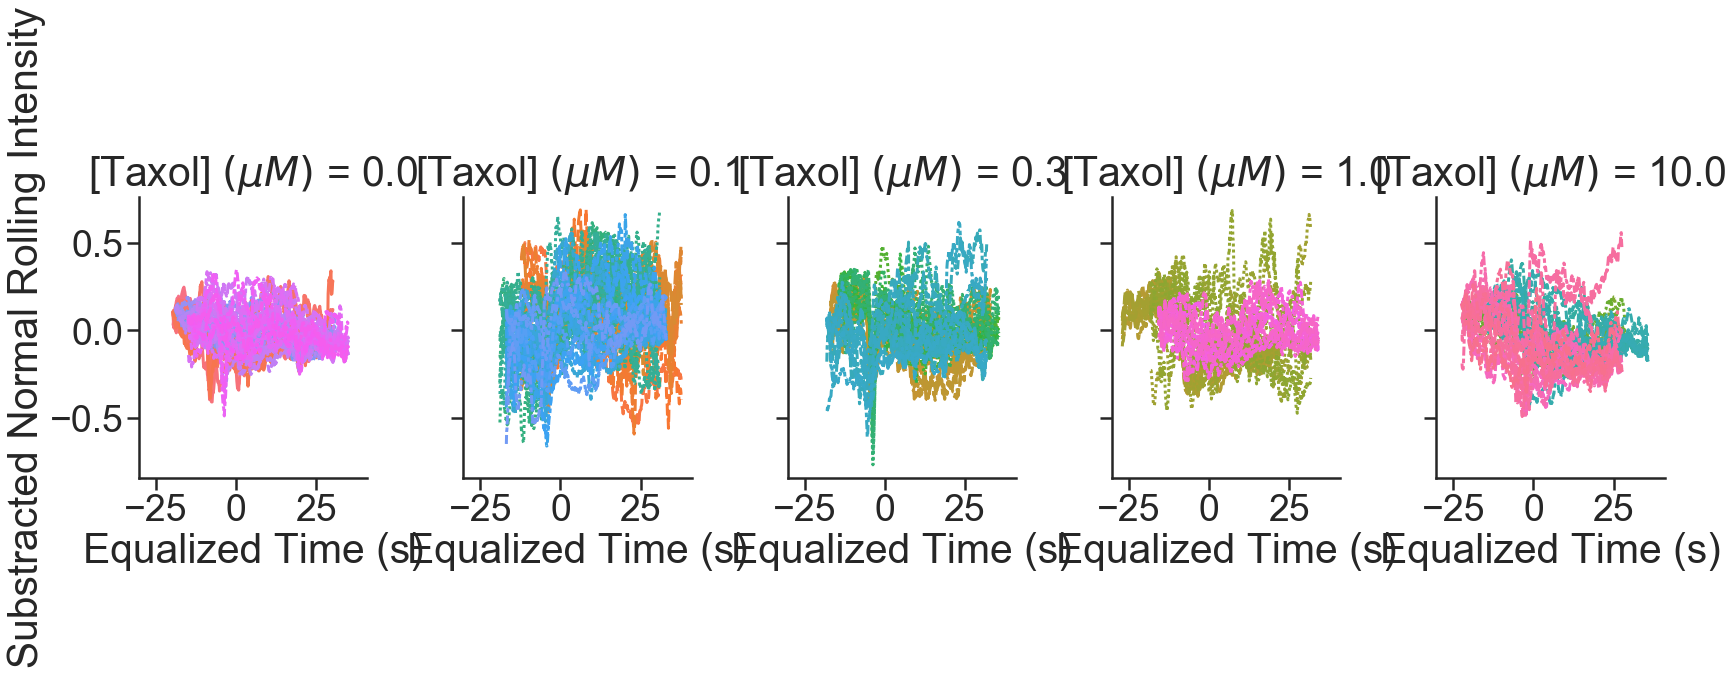

In [104]:

sns.relplot(
    data=equal_time_MT, x='Equalized Time (s)', y='Substracted Normal Rolling Intensity', col=taxol,
    hue="Filename", style="Date", kind="line",legend=False,
    height=6, aspect=0.8
)

sns.set_style("ticks")
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

plt.tight_layout()

# plt.savefig(newmydir/('GFP'+date_today+'.pdf'))
# plt.savefig(newmydir/('GFP'+date_today+'.png'))

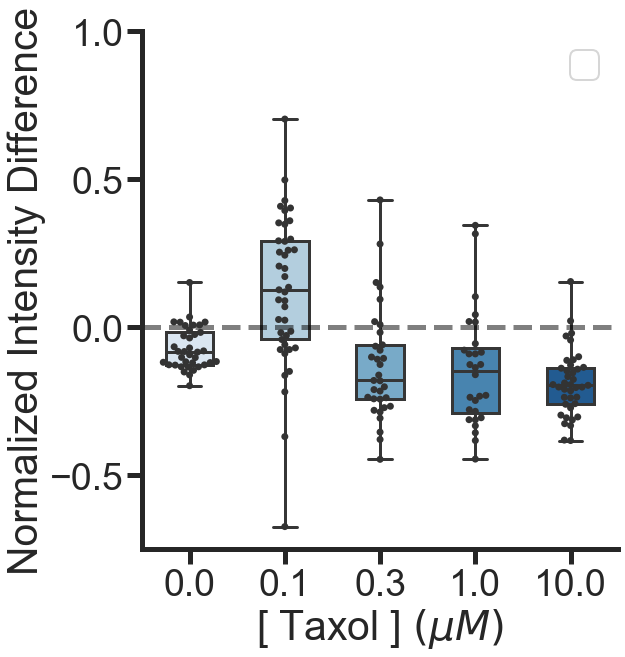

In [39]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

#rect = 0,0,1,1 # create an rectangle for the new axis
#log_ax = fig.add_axes(rect) # create a new axis (or use an existing one)
#log_ax.set_xscale("log") # log first

ax = sns.boxplot(x=taxol, y='Normalized Intensity Difference', data=difference, whis=np.inf, palette='Blues',linewidth=3, width=0.5)
ax = sns.swarmplot(x=taxol, y='Normalized Intensity Difference', data=difference, color=".2", size=7, label='TIRF Data')
ax.axhline(y = 0, color = "0" ,linestyle="--", linewidth=5, alpha=0.5)
plt.ylim(-0.75,1)

# ax.set_ylim(None,4)
#ax.legend( loc = 'upper left')
ax.legend('')
ax.set_xlabel('[ Taxol ] ' r'$ ( \mu M ) $')

sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)
ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()


#plt.savefig(newmydir/('photobleaching_swarm_'+date_today+'.svg'))

In [40]:
newmydir

WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter/Photobleaching_Data_Sheets/2022-06-27')

In [41]:
tax0 = difference[(difference[taxol]==0)]['Normalized Intensity Difference'].values
tax10 = difference[(difference[taxol]==10)]['Normalized Intensity Difference'].values


In [42]:
taxolunique = difference[taxol].unique()

In [43]:
pvalue0vs =[]
pvalue10vs =[]
n = []
for i in taxolunique:
    tax = difference[(difference[taxol]==i)]['Normalized Intensity Difference'].values
    s,p = stats.kruskal(tax0,tax)
    pvalue0vs = pvalue0vs + [p]
    s,p = stats.kruskal(tax10,tax)
    pvalue10vs = pvalue10vs + [p]
    n = n + [len(tax)]

In [44]:
pvalue0vs

[1.0,
 7.191624822840022e-06,
 0.016654759694190342,
 0.019035568760375283,
 2.6133550544494824e-07]

In [45]:
pvalue10vs

[2.6133550544494824e-07,
 1.5410528486074797e-09,
 0.25603576994466837,
 0.46869605269090797,
 1.0]

In [46]:
n

[37, 41, 33, 28, 39]

In [61]:
welch0vs =[]
welch10vs =[]
for i in taxolunique:
    tax = difference[(difference[taxol]==0)|(difference[taxol]==i)]
    w = pg.welch_anova(dv='Normalized Intensity Difference', between=taxol, data=tax)
    welch0vs = welch0vs + [w['p-unc'].values]
    tax = difference[(difference[taxol]==10)|(difference[taxol]==i)]
    w = pg.welch_anova(dv='Normalized Intensity Difference', between=taxol, data=tax)
    welch10vs = welch10vs + [w['p-unc'].values]

C:\ProgramData\Anaconda3\lib\site-packages\pingouin\parametric.py:1319: RuntimeWarning: invalid value encountered in double_scalars
  ms_betadj = ss_betadj / ddof1
C:\ProgramData\Anaconda3\lib\site-packages\pingouin\parametric.py:1323: RuntimeWarning: invalid value encountered in double_scalars
  (1 - (weights / weights.sum()))**2)) / (r**2 - 1)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:881: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [62]:
welch0vs

[array([nan]),
 array([2.52615741e-05]),
 array([0.11267289]),
 array([0.06387309]),
 array([6.26504686e-07])]

In [63]:
welch10vs

[array([6.26504686e-07]),
 array([2.08531554e-09]),
 array([0.11260563]),
 array([0.28404017]),
 array([nan])]

In [67]:
pg.welch_anova(dv='Normalized Intensity Difference', between=taxol, data=difference[(difference[taxol]==1)|(difference[taxol]==0.3)])

,Source,ddof1,ddof2,F,p-unc,np2
0,[Taxol] $(\mu M)$,1,57.090158,0.113324,0.737625,0.001922


You should run Welch’s test in all cases where you have normally distributed data that violates the assumption of homogeneity of variance